# Train RetinaNet (Backbone = ResNet152)

In [1]:
import tensorflow as tf
import numpy as np
from keras_retinanet import models
from keras_retinanet.preprocessing.csv_generator import CSVGenerator
from keras_retinanet.utils.transform import random_transform_generator
from keras_retinanet.utils.image import random_visual_effect_generator
from train_retinanet import create_models, create_callbacks, plot_history

In [2]:
np.random.seed(1) 
tf.random.set_seed(1)

In [3]:
tf.test.is_built_with_cuda()  

True

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) #print no of GPU device

Num GPUs Available:  1


In [5]:
backbone = models.backbone('resnet152')
weights = backbone.download_imagenet()

In [6]:
train_generator = CSVGenerator(
    csv_data_file='./dataset/train.csv',
    csv_class_file='./dataset/class.csv',
    no_resize = True,
    preprocess_image  = backbone.preprocess_image
)

val_generator = CSVGenerator(
    csv_data_file='./dataset/validation.csv',
    csv_class_file='./dataset/class.csv',
    no_resize = True,
    preprocess_image  = backbone.preprocess_image
)

In [7]:
lr = 1e-3 
epochs = 50
steps = 400

## Without Data Augmentation

In [8]:
training_model, prediction_model = create_models(backbone_retinanet=backbone.retinanet,
                                          num_classes=1,
                                          weights=weights,
                                          freeze_backbone=True,
                                          lr=lr
                                          )

In [9]:
log_file = './result/retinanet_resnet152_log.csv'
model_path = './result/retinanet_resnet152.h5'
callback = create_callbacks(training_model, prediction_model, val_generator, model_path, log_file)

In [10]:
prediction_model.summary()

Model: "retinanet-bbox"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6 0           bn_conv1[0][0]                   
_____________________________________________________________________________________

In [11]:
training_model.summary()

Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6 0           bn_conv1[0][0]                   
__________________________________________________________________________________________

In [12]:
history = training_model.fit(
                x=train_generator,
                epochs=epochs,
                verbose=1,
                validation_data=val_generator,
                callbacks=callback,
                steps_per_epoch = steps
                )

Epoch 1/50
400/400 [==============================] - ETA: 0s - loss: 3.4703 - regression_loss: 2.5754 - classification_loss: 0.8949WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0120s vs `on_test_batch_end` time: 0.1247s). Check your callbacks.


Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:14 Time:  0:00:14
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.1356
mAP: 0.1356

Epoch 00001: mAP improved from -inf to 0.13557, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 66s 165ms/step - loss: 3.4703 - regression_loss: 2.5754 - classification_loss: 0.8949 - val_loss: 3.0151 - val_regression_loss: 2.4385 - val_classification_loss: 0.5766
Epoch 2/50
400/400 [==============================] - ETA: 0s - loss: 2.6975 - regression_loss: 2.0999 - classification_loss: 0.5975

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.4103
mAP: 0.4103

Epoch 00002: mAP improved from 0.13557 to 0.41033, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 154ms/step - loss: 2.6975 - regression_loss: 2.0999 - classification_loss: 0.5975 - val_loss: 2.3323 - val_regression_loss: 1.8804 - val_classification_loss: 0.4519
Epoch 3/50
400/400 [==============================] - ETA: 0s - loss: 2.3331 - regression_loss: 1.8547 - classification_loss: 0.4784

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.5697
mAP: 0.5697

Epoch 00003: mAP improved from 0.41033 to 0.56973, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 156ms/step - loss: 2.3331 - regression_loss: 1.8547 - classification_loss: 0.4784 - val_loss: 2.1665 - val_regression_loss: 1.7835 - val_classification_loss: 0.3830
Epoch 4/50
400/400 [==============================] - ETA: 0s - loss: 2.0481 - regression_loss: 1.6270 - classification_loss: 0.4211

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6829
mAP: 0.6829

Epoch 00004: mAP improved from 0.56973 to 0.68291, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 63s 158ms/step - loss: 2.0481 - regression_loss: 1.6270 - classification_loss: 0.4211 - val_loss: 1.7709 - val_regression_loss: 1.4488 - val_classification_loss: 0.3222
Epoch 5/50
400/400 [==============================] - ETA: 0s - loss: 1.7796 - regression_loss: 1.4624 - classification_loss: 0.3172

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7182
mAP: 0.7182

Epoch 00005: mAP improved from 0.68291 to 0.71822, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 155ms/step - loss: 1.7796 - regression_loss: 1.4624 - classification_loss: 0.3172 - val_loss: 1.7450 - val_regression_loss: 1.4367 - val_classification_loss: 0.3083
Epoch 6/50
400/400 [==============================] - ETA: 0s - loss: 1.6042 - regression_loss: 1.3260 - classification_loss: 0.2781

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7477
mAP: 0.7477

Epoch 00006: mAP improved from 0.71822 to 0.74773, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 155ms/step - loss: 1.6042 - regression_loss: 1.3260 - classification_loss: 0.2781 - val_loss: 1.5792 - val_regression_loss: 1.3020 - val_classification_loss: 0.2772
Epoch 7/50
400/400 [==============================] - ETA: 0s - loss: 1.4847 - regression_loss: 1.2215 - classification_loss: 0.2631

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7590
mAP: 0.7590

Epoch 00007: mAP improved from 0.74773 to 0.75901, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 156ms/step - loss: 1.4847 - regression_loss: 1.2215 - classification_loss: 0.2631 - val_loss: 1.5541 - val_regression_loss: 1.2796 - val_classification_loss: 0.2745
Epoch 8/50
400/400 [==============================] - ETA: 0s - loss: 1.3714 - regression_loss: 1.1346 - classification_loss: 0.2368

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8015
mAP: 0.8015

Epoch 00008: mAP improved from 0.75901 to 0.80145, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 63s 158ms/step - loss: 1.3714 - regression_loss: 1.1346 - classification_loss: 0.2368 - val_loss: 1.4926 - val_regression_loss: 1.2409 - val_classification_loss: 0.2517
Epoch 9/50
400/400 [==============================] - ETA: 0s - loss: 1.2887 - regression_loss: 1.0733 - classification_loss: 0.2154

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8082
mAP: 0.8082

Epoch 00009: mAP improved from 0.80145 to 0.80824, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 155ms/step - loss: 1.2887 - regression_loss: 1.0733 - classification_loss: 0.2154 - val_loss: 1.4929 - val_regression_loss: 1.2301 - val_classification_loss: 0.2628
Epoch 10/50
400/400 [==============================] - ETA: 0s - loss: 1.1922 - regression_loss: 1.0070 - classification_loss: 0.1852

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8115
mAP: 0.8115

Epoch 00010: mAP improved from 0.80824 to 0.81154, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 155ms/step - loss: 1.1922 - regression_loss: 1.0070 - classification_loss: 0.1852 - val_loss: 1.4495 - val_regression_loss: 1.2164 - val_classification_loss: 0.2331
Epoch 11/50
400/400 [==============================] - ETA: 0s - loss: 1.0890 - regression_loss: 0.9204 - classification_loss: 0.1686

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8173
mAP: 0.8173

Epoch 00011: mAP improved from 0.81154 to 0.81730, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 156ms/step - loss: 1.0890 - regression_loss: 0.9204 - classification_loss: 0.1686 - val_loss: 1.4345 - val_regression_loss: 1.2134 - val_classification_loss: 0.2211
Epoch 12/50
400/400 [==============================] - ETA: 0s - loss: 1.0887 - regression_loss: 0.9194 - classification_loss: 0.1694

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8328
mAP: 0.8328

Epoch 00012: mAP improved from 0.81730 to 0.83276, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 155ms/step - loss: 1.0887 - regression_loss: 0.9194 - classification_loss: 0.1694 - val_loss: 1.3609 - val_regression_loss: 1.1401 - val_classification_loss: 0.2209
Epoch 13/50
400/400 [==============================] - ETA: 0s - loss: 0.9580 - regression_loss: 0.8143 - classification_loss: 0.1437

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8157
mAP: 0.8157

Epoch 00013: mAP did not improve from 0.83276
400/400 [==============================] - 59s 148ms/step - loss: 0.9580 - regression_loss: 0.8143 - classification_loss: 0.1437 - val_loss: 1.4446 - val_regression_loss: 1.2116 - val_classification_loss: 0.2330
Epoch 14/50
400/400 [==============================] - ETA: 0s - loss: 0.9124 - regression_loss: 0.7727 - classification_loss: 0.1397

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8268
mAP: 0.8268

Epoch 00014: mAP did not improve from 0.83276
400/400 [==============================] - 59s 148ms/step - loss: 0.9124 - regression_loss: 0.7727 - classification_loss: 0.1397 - val_loss: 1.3142 - val_regression_loss: 1.0972 - val_classification_loss: 0.2169
Epoch 15/50
400/400 [==============================] - ETA: 0s - loss: 0.8539 - regression_loss: 0.7281 - classification_loss: 0.1259

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8308
mAP: 0.8308

Epoch 00015: mAP did not improve from 0.83276
400/400 [==============================] - 59s 147ms/step - loss: 0.8539 - regression_loss: 0.7281 - classification_loss: 0.1259 - val_loss: 1.3136 - val_regression_loss: 1.0931 - val_classification_loss: 0.2205
Epoch 16/50
400/400 [==============================] - ETA: 0s - loss: 0.8858 - regression_loss: 0.7505 - classification_loss: 0.1352

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8371
mAP: 0.8371

Epoch 00016: mAP improved from 0.83276 to 0.83708, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 155ms/step - loss: 0.8858 - regression_loss: 0.7505 - classification_loss: 0.1352 - val_loss: 1.2866 - val_regression_loss: 1.0638 - val_classification_loss: 0.2228
Epoch 17/50
400/400 [==============================] - ETA: 0s - loss: 0.8258 - regression_loss: 0.6868 - classification_loss: 0.1391

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8376
mAP: 0.8376

Epoch 00017: mAP improved from 0.83708 to 0.83764, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 156ms/step - loss: 0.8258 - regression_loss: 0.6868 - classification_loss: 0.1391 - val_loss: 1.2696 - val_regression_loss: 1.0517 - val_classification_loss: 0.2180
Epoch 18/50
400/400 [==============================] - ETA: 0s - loss: 0.7585 - regression_loss: 0.6477 - classification_loss: 0.1109

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8378
mAP: 0.8378

Epoch 00018: mAP improved from 0.83764 to 0.83780, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 155ms/step - loss: 0.7585 - regression_loss: 0.6477 - classification_loss: 0.1109 - val_loss: 1.2367 - val_regression_loss: 1.0189 - val_classification_loss: 0.2178
Epoch 19/50
400/400 [==============================] - ETA: 0s - loss: 0.7300 - regression_loss: 0.6232 - classification_loss: 0.1068

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8376
mAP: 0.8376

Epoch 00019: mAP did not improve from 0.83780
400/400 [==============================] - 59s 147ms/step - loss: 0.7300 - regression_loss: 0.6232 - classification_loss: 0.1068 - val_loss: 1.2494 - val_regression_loss: 1.0292 - val_classification_loss: 0.2202
Epoch 20/50
400/400 [==============================] - ETA: 0s - loss: 0.6678 - regression_loss: 0.5709 - classification_loss: 0.0969

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8487
mAP: 0.8487

Epoch 00020: mAP improved from 0.83780 to 0.84870, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 155ms/step - loss: 0.6678 - regression_loss: 0.5709 - classification_loss: 0.0969 - val_loss: 1.2118 - val_regression_loss: 0.9868 - val_classification_loss: 0.2250
Epoch 21/50
400/400 [==============================] - ETA: 0s - loss: 0.6400 - regression_loss: 0.5383 - classification_loss: 0.1016

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8570
mAP: 0.8570

Epoch 00021: mAP improved from 0.84870 to 0.85702, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 63s 158ms/step - loss: 0.6400 - regression_loss: 0.5383 - classification_loss: 0.1016 - val_loss: 1.2395 - val_regression_loss: 1.0276 - val_classification_loss: 0.2119
Epoch 22/50
400/400 [==============================] - ETA: 0s - loss: 0.6613 - regression_loss: 0.5587 - classification_loss: 0.1026

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8441
mAP: 0.8441

Epoch 00022: mAP did not improve from 0.85702
400/400 [==============================] - 59s 147ms/step - loss: 0.6613 - regression_loss: 0.5587 - classification_loss: 0.1026 - val_loss: 1.2418 - val_regression_loss: 1.0182 - val_classification_loss: 0.2236
Epoch 23/50
400/400 [==============================] - ETA: 0s - loss: 0.5877 - regression_loss: 0.4954 - classification_loss: 0.0923

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8554
mAP: 0.8554

Epoch 00023: mAP did not improve from 0.85702
400/400 [==============================] - 59s 147ms/step - loss: 0.5877 - regression_loss: 0.4954 - classification_loss: 0.0923 - val_loss: 1.1711 - val_regression_loss: 0.9538 - val_classification_loss: 0.2173
Epoch 24/50
400/400 [==============================] - ETA: 0s - loss: 0.5253 - regression_loss: 0.4512 - classification_loss: 0.0741

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8504
mAP: 0.8504

Epoch 00024: mAP did not improve from 0.85702
400/400 [==============================] - 59s 148ms/step - loss: 0.5253 - regression_loss: 0.4512 - classification_loss: 0.0741 - val_loss: 1.1659 - val_regression_loss: 0.9450 - val_classification_loss: 0.2209
Epoch 25/50
400/400 [==============================] - ETA: 0s - loss: 0.5663 - regression_loss: 0.4805 - classification_loss: 0.0859

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8561
mAP: 0.8561

Epoch 00025: mAP did not improve from 0.85702
400/400 [==============================] - 59s 148ms/step - loss: 0.5663 - regression_loss: 0.4805 - classification_loss: 0.0859 - val_loss: 1.1919 - val_regression_loss: 0.9654 - val_classification_loss: 0.2266
Epoch 26/50
400/400 [==============================] - ETA: 0s - loss: 0.5099 - regression_loss: 0.4300 - classification_loss: 0.0799

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8501
mAP: 0.8501

Epoch 00026: mAP did not improve from 0.85702
400/400 [==============================] - 59s 148ms/step - loss: 0.5099 - regression_loss: 0.4300 - classification_loss: 0.0799 - val_loss: 1.1744 - val_regression_loss: 0.9470 - val_classification_loss: 0.2274
Epoch 27/50
400/400 [==============================] - ETA: 0s - loss: 0.4523 - regression_loss: 0.3909 - classification_loss: 0.0614

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8567
mAP: 0.8567

Epoch 00027: mAP did not improve from 0.85702
400/400 [==============================] - 59s 147ms/step - loss: 0.4523 - regression_loss: 0.3909 - classification_loss: 0.0614 - val_loss: 1.1613 - val_regression_loss: 0.9292 - val_classification_loss: 0.2321
Epoch 28/50
400/400 [==============================] - ETA: 0s - loss: 0.4419 - regression_loss: 0.3793 - classification_loss: 0.0626

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8624
mAP: 0.8624

Epoch 00028: mAP improved from 0.85702 to 0.86241, saving model to ./result\retinanet_resnet152.h5
400/400 [==============================] - 62s 155ms/step - loss: 0.4419 - regression_loss: 0.3793 - classification_loss: 0.0626 - val_loss: 1.1598 - val_regression_loss: 0.9352 - val_classification_loss: 0.2246
Epoch 29/50
400/400 [==============================] - ETA: 0s - loss: 0.4446 - regression_loss: 0.3830 - classification_loss: 0.0616

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8415
mAP: 0.8415

Epoch 00029: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.4446 - regression_loss: 0.3830 - classification_loss: 0.0616 - val_loss: 1.1905 - val_regression_loss: 0.9512 - val_classification_loss: 0.2393
Epoch 30/50
400/400 [==============================] - ETA: 0s - loss: 0.4180 - regression_loss: 0.3565 - classification_loss: 0.0615

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8519
mAP: 0.8519

Epoch 00030: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.4180 - regression_loss: 0.3565 - classification_loss: 0.0615 - val_loss: 1.1699 - val_regression_loss: 0.9371 - val_classification_loss: 0.2328
Epoch 31/50
400/400 [==============================] - ETA: 0s - loss: 0.3995 - regression_loss: 0.3456 - classification_loss: 0.0539

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8485
mAP: 0.8485

Epoch 00031: mAP did not improve from 0.86241
400/400 [==============================] - 59s 148ms/step - loss: 0.3995 - regression_loss: 0.3456 - classification_loss: 0.0539 - val_loss: 1.1632 - val_regression_loss: 0.9289 - val_classification_loss: 0.2343
Epoch 32/50
400/400 [==============================] - ETA: 0s - loss: 0.3662 - regression_loss: 0.3178 - classification_loss: 0.0484

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8500
mAP: 0.8500

Epoch 00032: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.3662 - regression_loss: 0.3178 - classification_loss: 0.0484 - val_loss: 1.1629 - val_regression_loss: 0.9116 - val_classification_loss: 0.2513
Epoch 33/50
400/400 [==============================] - ETA: 0s - loss: 0.3508 - regression_loss: 0.3051 - classification_loss: 0.0457

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8532
mAP: 0.8532

Epoch 00033: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.3508 - regression_loss: 0.3051 - classification_loss: 0.0457 - val_loss: 1.1488 - val_regression_loss: 0.9086 - val_classification_loss: 0.2402
Epoch 34/50
400/400 [==============================] - ETA: 0s - loss: 0.3489 - regression_loss: 0.3020 - classification_loss: 0.0469

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8529
mAP: 0.8529

Epoch 00034: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.3489 - regression_loss: 0.3020 - classification_loss: 0.0469 - val_loss: 1.1636 - val_regression_loss: 0.9109 - val_classification_loss: 0.2527
Epoch 35/50
400/400 [==============================] - ETA: 0s - loss: 0.3484 - regression_loss: 0.2987 - classification_loss: 0.0496

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8533
mAP: 0.8533

Epoch 00035: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.3484 - regression_loss: 0.2987 - classification_loss: 0.0496 - val_loss: 1.1314 - val_regression_loss: 0.8895 - val_classification_loss: 0.2420
Epoch 36/50
400/400 [==============================] - ETA: 0s - loss: 0.3402 - regression_loss: 0.2897 - classification_loss: 0.0506

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8536
mAP: 0.8536

Epoch 00036: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.3402 - regression_loss: 0.2897 - classification_loss: 0.0506 - val_loss: 1.1559 - val_regression_loss: 0.9021 - val_classification_loss: 0.2538
Epoch 37/50
400/400 [==============================] - ETA: 0s - loss: 0.3061 - regression_loss: 0.2619 - classification_loss: 0.0442

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8443
mAP: 0.8443

Epoch 00037: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.3061 - regression_loss: 0.2619 - classification_loss: 0.0442 - val_loss: 1.1691 - val_regression_loss: 0.9165 - val_classification_loss: 0.2526
Epoch 38/50
400/400 [==============================] - ETA: 0s - loss: 0.2813 - regression_loss: 0.2447 - classification_loss: 0.0366

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8502
mAP: 0.8502

Epoch 00038: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.2813 - regression_loss: 0.2447 - classification_loss: 0.0366 - val_loss: 1.1422 - val_regression_loss: 0.8876 - val_classification_loss: 0.2546
Epoch 39/50
400/400 [==============================] - ETA: 0s - loss: 0.2685 - regression_loss: 0.2345 - classification_loss: 0.0340

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8476
mAP: 0.8476

Epoch 00039: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.2685 - regression_loss: 0.2345 - classification_loss: 0.0340 - val_loss: 1.1689 - val_regression_loss: 0.8928 - val_classification_loss: 0.2761
Epoch 40/50
400/400 [==============================] - ETA: 0s - loss: 0.2339 - regression_loss: 0.2053 - classification_loss: 0.0287

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8592
mAP: 0.8592

Epoch 00040: mAP did not improve from 0.86241

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
400/400 [==============================] - 59s 147ms/step - loss: 0.2339 - regression_loss: 0.2053 - classification_loss: 0.0287 - val_loss: 1.1589 - val_regression_loss: 0.8936 - val_classification_loss: 0.2653
Epoch 41/50
400/400 [==============================] - ETA: 0s - loss: 0.2382 - regression_loss: 0.2044 - classification_loss: 0.0338

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8600
mAP: 0.8600

Epoch 00041: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.2382 - regression_loss: 0.2044 - classification_loss: 0.0338 - val_loss: 1.1262 - val_regression_loss: 0.8636 - val_classification_loss: 0.2626
Epoch 42/50
400/400 [==============================] - ETA: 0s - loss: 0.1975 - regression_loss: 0.1674 - classification_loss: 0.0301

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8600
mAP: 0.8600

Epoch 00042: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.1975 - regression_loss: 0.1674 - classification_loss: 0.0301 - val_loss: 1.1222 - val_regression_loss: 0.8608 - val_classification_loss: 0.2614
Epoch 43/50
400/400 [==============================] - ETA: 0s - loss: 0.1841 - regression_loss: 0.1547 - classification_loss: 0.0294

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8620
mAP: 0.8620

Epoch 00043: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.1841 - regression_loss: 0.1547 - classification_loss: 0.0294 - val_loss: 1.1219 - val_regression_loss: 0.8600 - val_classification_loss: 0.2619
Epoch 44/50
400/400 [==============================] - ETA: 0s - loss: 0.1824 - regression_loss: 0.1536 - classification_loss: 0.0288

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8618
mAP: 0.8618

Epoch 00044: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.1824 - regression_loss: 0.1536 - classification_loss: 0.0288 - val_loss: 1.1191 - val_regression_loss: 0.8566 - val_classification_loss: 0.2625
Epoch 45/50
400/400 [==============================] - ETA: 0s - loss: 0.1728 - regression_loss: 0.1442 - classification_loss: 0.0286

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8622
mAP: 0.8622

Epoch 00045: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.1728 - regression_loss: 0.1442 - classification_loss: 0.0286 - val_loss: 1.1227 - val_regression_loss: 0.8596 - val_classification_loss: 0.2632
Epoch 46/50
400/400 [==============================] - ETA: 0s - loss: 0.1651 - regression_loss: 0.1380 - classification_loss: 0.0270

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8618
mAP: 0.8618

Epoch 00046: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.1651 - regression_loss: 0.1380 - classification_loss: 0.0270 - val_loss: 1.1203 - val_regression_loss: 0.8575 - val_classification_loss: 0.2628
Epoch 47/50
400/400 [==============================] - ETA: 0s - loss: 0.1613 - regression_loss: 0.1348 - classification_loss: 0.0265

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8615
mAP: 0.8615

Epoch 00047: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.1613 - regression_loss: 0.1348 - classification_loss: 0.0265 - val_loss: 1.1262 - val_regression_loss: 0.8611 - val_classification_loss: 0.2652
Epoch 48/50
400/400 [==============================] - ETA: 0s - loss: 0.1560 - regression_loss: 0.1303 - classification_loss: 0.0257

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8613
mAP: 0.8613

Epoch 00048: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.1560 - regression_loss: 0.1303 - classification_loss: 0.0257 - val_loss: 1.1276 - val_regression_loss: 0.8610 - val_classification_loss: 0.2666
Epoch 49/50
400/400 [==============================] - ETA: 0s - loss: 0.1542 - regression_loss: 0.1259 - classification_loss: 0.0283

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8609
mAP: 0.8609

Epoch 00049: mAP did not improve from 0.86241

Epoch 00049: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
400/400 [==============================] - 59s 148ms/step - loss: 0.1542 - regression_loss: 0.1259 - classification_loss: 0.0283 - val_loss: 1.1283 - val_regression_loss: 0.8611 - val_classification_loss: 0.2673
Epoch 50/50
400/400 [==============================] - ETA: 0s - loss: 0.1611 - regression_loss: 0.1295 - classification_loss: 0.0317

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8610
mAP: 0.8610

Epoch 00050: mAP did not improve from 0.86241
400/400 [==============================] - 59s 147ms/step - loss: 0.1611 - regression_loss: 0.1295 - classification_loss: 0.0317 - val_loss: 1.1282 - val_regression_loss: 0.8612 - val_classification_loss: 0.2670


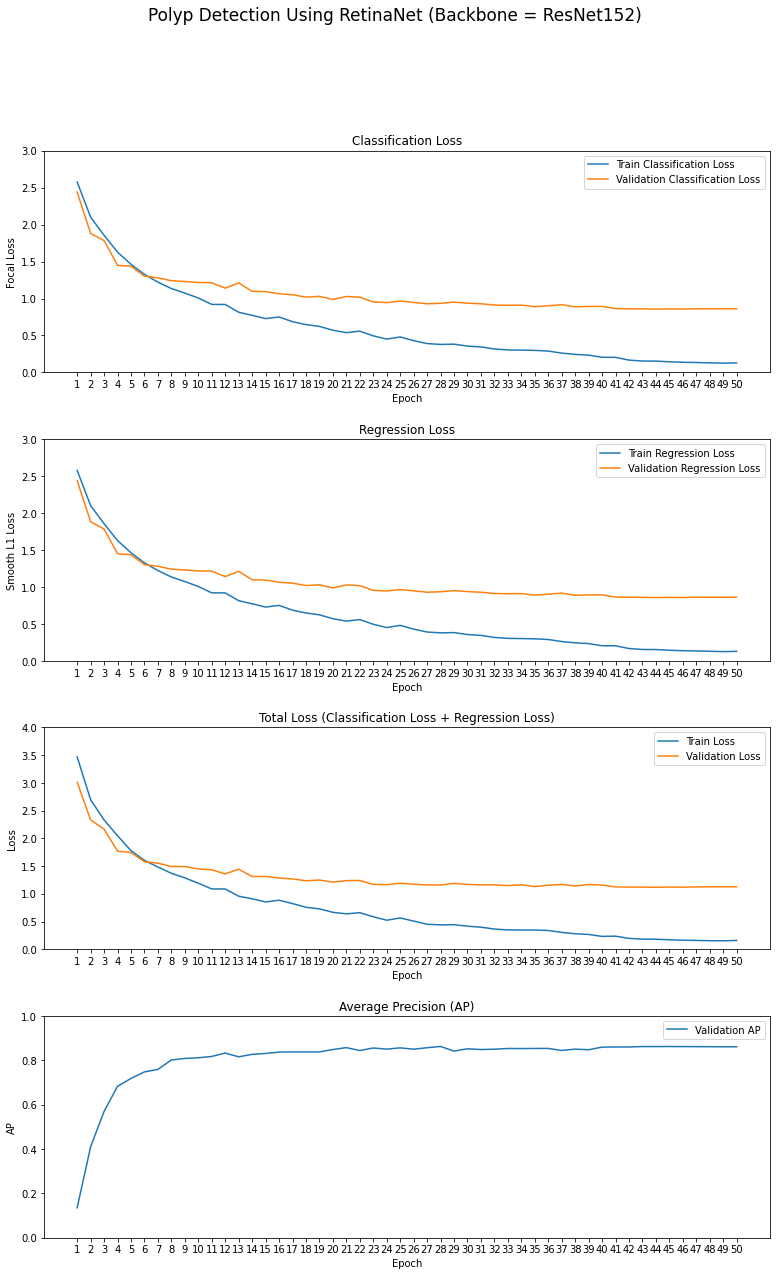

In [13]:
fig = './result/retinanet_resnet152.png'
plot_history(history, fig, 'Polyp Detection Using RetinaNet (Backbone = ResNet152)', epochs)

## With Data Augmentation

In [14]:
training_model_aug, prediction_model_aug = create_models(backbone_retinanet=backbone.retinanet,
                                          num_classes=1,
                                          weights=weights,
                                          freeze_backbone=True,
                                          lr=lr)

In [15]:
transform_generator = random_transform_generator(
            min_rotation=-0.1,
            max_rotation=0.1,
            min_scaling=(0.9, 0.9),
            max_scaling=(1.1, 1.1),
            flip_x_chance=0.5,
            flip_y_chance=0.5,
        )
visual_effect_generator = random_visual_effect_generator(
            contrast_range=(0.9, 1.1),
            brightness_range=(-.1, .1),
        )

In [16]:
train_generator_aug = CSVGenerator(
    csv_data_file='./dataset/train.csv',
    csv_class_file='./dataset/class.csv',
    no_resize = True,
    preprocess_image  = backbone.preprocess_image,
    transform_generator=transform_generator,
    visual_effect_generator=visual_effect_generator
)

In [17]:
model_path_aug = './result/retinanet_resnet152_aug.h5'
log_file_aug = './result/retinanet_resnet152_aug_log.csv'
callback_aug = create_callbacks(training_model_aug, prediction_model_aug, val_generator, model_path_aug, log_file_aug)

In [18]:
history_aug = training_model_aug.fit(
                x=train_generator_aug,
                epochs=epochs,
                verbose=1,
                validation_data=val_generator,
                callbacks=callback_aug,
                steps_per_epoch = steps
                )

Epoch 1/50
400/400 [==============================] - ETA: 0s - loss: 3.5137 - regression_loss: 2.5496 - classification_loss: 0.9641WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0130s vs `on_test_batch_end` time: 0.1067s). Check your callbacks.


Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:15 Time:  0:00:15
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.1145
mAP: 0.1145

Epoch 00001: mAP improved from -inf to 0.11454, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 68s 170ms/step - loss: 3.5137 - regression_loss: 2.5496 - classification_loss: 0.9641 - val_loss: 3.2187 - val_regression_loss: 2.3827 - val_classification_loss: 0.8361
Epoch 2/50
400/400 [==============================] - ETA: 0s - loss: 3.1270 - regression_loss: 2.1798 - classification_loss: 0.9472

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00002: mAP did not improve from 0.11454
400/400 [==============================] - 60s 150ms/step - loss: 3.1270 - regression_loss: 2.1798 - classification_loss: 0.9472 - val_loss: 3.0689 - val_regression_loss: 2.0062 - val_classification_loss: 1.0627
Epoch 3/50
400/400 [==============================] - ETA: 0s - loss: 2.8462 - regression_loss: 1.9992 - classification_loss: 0.8470

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.3663
mAP: 0.3663

Epoch 00003: mAP improved from 0.11454 to 0.36630, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 64s 159ms/step - loss: 2.8462 - regression_loss: 1.9992 - classification_loss: 0.8470 - val_loss: 2.2345 - val_regression_loss: 1.7851 - val_classification_loss: 0.4494
Epoch 4/50
400/400 [==============================] - ETA: 0s - loss: 2.3296 - regression_loss: 1.7850 - classification_loss: 0.5446

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.4983
mAP: 0.4983

Epoch 00004: mAP improved from 0.36630 to 0.49830, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 157ms/step - loss: 2.3296 - regression_loss: 1.7850 - classification_loss: 0.5446 - val_loss: 2.1865 - val_regression_loss: 1.7303 - val_classification_loss: 0.4562
Epoch 5/50
400/400 [==============================] - ETA: 0s - loss: 2.0402 - regression_loss: 1.6304 - classification_loss: 0.4098

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6733
mAP: 0.6733

Epoch 00005: mAP improved from 0.49830 to 0.67333, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 158ms/step - loss: 2.0402 - regression_loss: 1.6304 - classification_loss: 0.4098 - val_loss: 2.0827 - val_regression_loss: 1.6764 - val_classification_loss: 0.4063
Epoch 6/50
400/400 [==============================] - ETA: 0s - loss: 1.8849 - regression_loss: 1.5402 - classification_loss: 0.3446

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7288
mAP: 0.7288

Epoch 00006: mAP improved from 0.67333 to 0.72880, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 62s 156ms/step - loss: 1.8849 - regression_loss: 1.5402 - classification_loss: 0.3446 - val_loss: 1.7827 - val_regression_loss: 1.4706 - val_classification_loss: 0.3120
Epoch 7/50
400/400 [==============================] - ETA: 0s - loss: 1.8089 - regression_loss: 1.4784 - classification_loss: 0.3305

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7606
mAP: 0.7606

Epoch 00007: mAP improved from 0.72880 to 0.76057, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 157ms/step - loss: 1.8089 - regression_loss: 1.4784 - classification_loss: 0.3305 - val_loss: 1.7564 - val_regression_loss: 1.4420 - val_classification_loss: 0.3144
Epoch 8/50
400/400 [==============================] - ETA: 0s - loss: 1.7290 - regression_loss: 1.4152 - classification_loss: 0.3138

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7637
mAP: 0.7637

Epoch 00008: mAP improved from 0.76057 to 0.76369, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 158ms/step - loss: 1.7290 - regression_loss: 1.4152 - classification_loss: 0.3138 - val_loss: 1.7691 - val_regression_loss: 1.4665 - val_classification_loss: 0.3026
Epoch 9/50
400/400 [==============================] - ETA: 0s - loss: 1.6167 - regression_loss: 1.3367 - classification_loss: 0.2800

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7819
mAP: 0.7819

Epoch 00009: mAP improved from 0.76369 to 0.78194, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 62s 156ms/step - loss: 1.6167 - regression_loss: 1.3367 - classification_loss: 0.2800 - val_loss: 1.7500 - val_regression_loss: 1.4868 - val_classification_loss: 0.2632
Epoch 10/50
400/400 [==============================] - ETA: 0s - loss: 1.6059 - regression_loss: 1.3217 - classification_loss: 0.2842

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7797
mAP: 0.7797

Epoch 00010: mAP did not improve from 0.78194
400/400 [==============================] - 59s 149ms/step - loss: 1.6059 - regression_loss: 1.3217 - classification_loss: 0.2842 - val_loss: 1.4897 - val_regression_loss: 1.2488 - val_classification_loss: 0.2409
Epoch 11/50
400/400 [==============================] - ETA: 0s - loss: 1.5292 - regression_loss: 1.2424 - classification_loss: 0.2868

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7817
mAP: 0.7817

Epoch 00011: mAP did not improve from 0.78194
400/400 [==============================] - 59s 148ms/step - loss: 1.5292 - regression_loss: 1.2424 - classification_loss: 0.2868 - val_loss: 1.5294 - val_regression_loss: 1.2694 - val_classification_loss: 0.2601
Epoch 12/50
400/400 [==============================] - ETA: 0s - loss: 1.4796 - regression_loss: 1.2256 - classification_loss: 0.2541

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8000
mAP: 0.8000

Epoch 00012: mAP improved from 0.78194 to 0.79998, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 62s 156ms/step - loss: 1.4796 - regression_loss: 1.2256 - classification_loss: 0.2541 - val_loss: 1.6165 - val_regression_loss: 1.3715 - val_classification_loss: 0.2450
Epoch 13/50
400/400 [==============================] - ETA: 0s - loss: 1.4799 - regression_loss: 1.2324 - classification_loss: 0.2475

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8106
mAP: 0.8106

Epoch 00013: mAP improved from 0.79998 to 0.81060, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 62s 156ms/step - loss: 1.4799 - regression_loss: 1.2324 - classification_loss: 0.2475 - val_loss: 1.4904 - val_regression_loss: 1.2518 - val_classification_loss: 0.2386
Epoch 14/50
400/400 [==============================] - ETA: 0s - loss: 1.4415 - regression_loss: 1.1988 - classification_loss: 0.2428

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8162
mAP: 0.8162

Epoch 00014: mAP improved from 0.81060 to 0.81624, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 157ms/step - loss: 1.4415 - regression_loss: 1.1988 - classification_loss: 0.2428 - val_loss: 1.5490 - val_regression_loss: 1.2303 - val_classification_loss: 0.3187
Epoch 15/50
400/400 [==============================] - ETA: 0s - loss: 1.3445 - regression_loss: 1.1145 - classification_loss: 0.2300

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7981
mAP: 0.7981

Epoch 00015: mAP did not improve from 0.81624
400/400 [==============================] - 59s 148ms/step - loss: 1.3445 - regression_loss: 1.1145 - classification_loss: 0.2300 - val_loss: 1.4624 - val_regression_loss: 1.2127 - val_classification_loss: 0.2496
Epoch 16/50
400/400 [==============================] - ETA: 0s - loss: 1.3503 - regression_loss: 1.1176 - classification_loss: 0.2328

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8238
mAP: 0.8238

Epoch 00016: mAP improved from 0.81624 to 0.82383, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 157ms/step - loss: 1.3503 - regression_loss: 1.1176 - classification_loss: 0.2328 - val_loss: 1.4501 - val_regression_loss: 1.2172 - val_classification_loss: 0.2329
Epoch 17/50
400/400 [==============================] - ETA: 0s - loss: 1.3184 - regression_loss: 1.0949 - classification_loss: 0.2235

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8145
mAP: 0.8145

Epoch 00017: mAP did not improve from 0.82383
400/400 [==============================] - 59s 149ms/step - loss: 1.3184 - regression_loss: 1.0949 - classification_loss: 0.2235 - val_loss: 1.3722 - val_regression_loss: 1.1582 - val_classification_loss: 0.2141
Epoch 18/50
400/400 [==============================] - ETA: 0s - loss: 1.2738 - regression_loss: 1.0638 - classification_loss: 0.2100

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8338
mAP: 0.8338

Epoch 00018: mAP improved from 0.82383 to 0.83378, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 157ms/step - loss: 1.2738 - regression_loss: 1.0638 - classification_loss: 0.2100 - val_loss: 1.3465 - val_regression_loss: 1.1350 - val_classification_loss: 0.2116
Epoch 19/50
400/400 [==============================] - ETA: 0s - loss: 1.2971 - regression_loss: 1.0764 - classification_loss: 0.2208

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8381
mAP: 0.8381

Epoch 00019: mAP improved from 0.83378 to 0.83806, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 62s 156ms/step - loss: 1.2971 - regression_loss: 1.0764 - classification_loss: 0.2208 - val_loss: 1.3603 - val_regression_loss: 1.1446 - val_classification_loss: 0.2156
Epoch 20/50
400/400 [==============================] - ETA: 0s - loss: 1.2693 - regression_loss: 1.0568 - classification_loss: 0.2125

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8339
mAP: 0.8339

Epoch 00020: mAP did not improve from 0.83806
400/400 [==============================] - 59s 149ms/step - loss: 1.2693 - regression_loss: 1.0568 - classification_loss: 0.2125 - val_loss: 1.2744 - val_regression_loss: 1.0587 - val_classification_loss: 0.2157
Epoch 21/50
400/400 [==============================] - ETA: 0s - loss: 1.1875 - regression_loss: 0.9865 - classification_loss: 0.2010

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8580
mAP: 0.8580

Epoch 00021: mAP improved from 0.83806 to 0.85797, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 62s 156ms/step - loss: 1.1875 - regression_loss: 0.9865 - classification_loss: 0.2010 - val_loss: 1.2618 - val_regression_loss: 1.0611 - val_classification_loss: 0.2007
Epoch 22/50
400/400 [==============================] - ETA: 0s - loss: 1.1740 - regression_loss: 0.9746 - classification_loss: 0.1994

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8513
mAP: 0.8513

Epoch 00022: mAP did not improve from 0.85797
400/400 [==============================] - 59s 148ms/step - loss: 1.1740 - regression_loss: 0.9746 - classification_loss: 0.1994 - val_loss: 1.2907 - val_regression_loss: 1.0788 - val_classification_loss: 0.2119
Epoch 23/50
400/400 [==============================] - ETA: 0s - loss: 1.1979 - regression_loss: 0.9989 - classification_loss: 0.1990

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8588
mAP: 0.8588

Epoch 00023: mAP improved from 0.85797 to 0.85877, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 156ms/step - loss: 1.1979 - regression_loss: 0.9989 - classification_loss: 0.1990 - val_loss: 1.2750 - val_regression_loss: 1.0807 - val_classification_loss: 0.1943
Epoch 24/50
400/400 [==============================] - ETA: 0s - loss: 1.1791 - regression_loss: 0.9680 - classification_loss: 0.2111

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8492
mAP: 0.8492

Epoch 00024: mAP did not improve from 0.85877
400/400 [==============================] - 59s 149ms/step - loss: 1.1791 - regression_loss: 0.9680 - classification_loss: 0.2111 - val_loss: 1.3312 - val_regression_loss: 1.0885 - val_classification_loss: 0.2427
Epoch 25/50
400/400 [==============================] - ETA: 0s - loss: 1.1397 - regression_loss: 0.9462 - classification_loss: 0.1936

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8342
mAP: 0.8342

Epoch 00025: mAP did not improve from 0.85877
400/400 [==============================] - 59s 148ms/step - loss: 1.1397 - regression_loss: 0.9462 - classification_loss: 0.1936 - val_loss: 1.3774 - val_regression_loss: 1.1655 - val_classification_loss: 0.2119
Epoch 26/50
400/400 [==============================] - ETA: 0s - loss: 1.1498 - regression_loss: 0.9565 - classification_loss: 0.1932

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8470
mAP: 0.8470

Epoch 00026: mAP did not improve from 0.85877

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
400/400 [==============================] - 59s 148ms/step - loss: 1.1498 - regression_loss: 0.9565 - classification_loss: 0.1932 - val_loss: 1.3053 - val_regression_loss: 1.0898 - val_classification_loss: 0.2155
Epoch 27/50
400/400 [==============================] - ETA: 0s - loss: 1.0575 - regression_loss: 0.8895 - classification_loss: 0.1679

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8518
mAP: 0.8518

Epoch 00027: mAP did not improve from 0.85877
400/400 [==============================] - 59s 148ms/step - loss: 1.0575 - regression_loss: 0.8895 - classification_loss: 0.1679 - val_loss: 1.2709 - val_regression_loss: 1.0715 - val_classification_loss: 0.1995
Epoch 28/50
400/400 [==============================] - ETA: 0s - loss: 0.9957 - regression_loss: 0.8299 - classification_loss: 0.1658

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8593
mAP: 0.8593

Epoch 00028: mAP improved from 0.85877 to 0.85933, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 62s 156ms/step - loss: 0.9957 - regression_loss: 0.8299 - classification_loss: 0.1658 - val_loss: 1.2172 - val_regression_loss: 1.0214 - val_classification_loss: 0.1958
Epoch 29/50
400/400 [==============================] - ETA: 0s - loss: 1.0505 - regression_loss: 0.8741 - classification_loss: 0.1764

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8550
mAP: 0.8550

Epoch 00029: mAP did not improve from 0.85933
400/400 [==============================] - 59s 148ms/step - loss: 1.0505 - regression_loss: 0.8741 - classification_loss: 0.1764 - val_loss: 1.2072 - val_regression_loss: 1.0144 - val_classification_loss: 0.1928
Epoch 30/50
400/400 [==============================] - ETA: 0s - loss: 0.9925 - regression_loss: 0.8297 - classification_loss: 0.1628

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8626
mAP: 0.8626

Epoch 00030: mAP improved from 0.85933 to 0.86259, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 157ms/step - loss: 0.9925 - regression_loss: 0.8297 - classification_loss: 0.1628 - val_loss: 1.1614 - val_regression_loss: 0.9705 - val_classification_loss: 0.1910
Epoch 31/50
400/400 [==============================] - ETA: 0s - loss: 0.9933 - regression_loss: 0.8259 - classification_loss: 0.1674

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8641
mAP: 0.8641

Epoch 00031: mAP improved from 0.86259 to 0.86413, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 62s 156ms/step - loss: 0.9933 - regression_loss: 0.8259 - classification_loss: 0.1674 - val_loss: 1.1633 - val_regression_loss: 0.9751 - val_classification_loss: 0.1883
Epoch 32/50
400/400 [==============================] - ETA: 0s - loss: 0.9812 - regression_loss: 0.8161 - classification_loss: 0.1651

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8573
mAP: 0.8573

Epoch 00032: mAP did not improve from 0.86413
400/400 [==============================] - 59s 148ms/step - loss: 0.9812 - regression_loss: 0.8161 - classification_loss: 0.1651 - val_loss: 1.2074 - val_regression_loss: 1.0168 - val_classification_loss: 0.1907
Epoch 33/50
400/400 [==============================] - ETA: 0s - loss: 0.9629 - regression_loss: 0.8062 - classification_loss: 0.1568

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8581
mAP: 0.8581

Epoch 00033: mAP did not improve from 0.86413
400/400 [==============================] - 59s 148ms/step - loss: 0.9629 - regression_loss: 0.8062 - classification_loss: 0.1568 - val_loss: 1.2177 - val_regression_loss: 1.0265 - val_classification_loss: 0.1911
Epoch 34/50
400/400 [==============================] - ETA: 0s - loss: 0.9758 - regression_loss: 0.8139 - classification_loss: 0.1619

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8680
mAP: 0.8680

Epoch 00034: mAP improved from 0.86413 to 0.86802, saving model to ./result\retinanet_resnet152_aug.h5
400/400 [==============================] - 63s 157ms/step - loss: 0.9758 - regression_loss: 0.8139 - classification_loss: 0.1619 - val_loss: 1.1598 - val_regression_loss: 0.9707 - val_classification_loss: 0.1891
Epoch 35/50
400/400 [==============================] - ETA: 0s - loss: 1.0127 - regression_loss: 0.8400 - classification_loss: 0.1727

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8574
mAP: 0.8574

Epoch 00035: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 1.0127 - regression_loss: 0.8400 - classification_loss: 0.1727 - val_loss: 1.1913 - val_regression_loss: 1.0013 - val_classification_loss: 0.1900
Epoch 36/50
400/400 [==============================] - ETA: 0s - loss: 0.9673 - regression_loss: 0.7933 - classification_loss: 0.1740

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8627
mAP: 0.8627

Epoch 00036: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9673 - regression_loss: 0.7933 - classification_loss: 0.1740 - val_loss: 1.1645 - val_regression_loss: 0.9773 - val_classification_loss: 0.1872
Epoch 37/50
400/400 [==============================] - ETA: 0s - loss: 0.9471 - regression_loss: 0.7910 - classification_loss: 0.1561

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8571
mAP: 0.8571

Epoch 00037: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9471 - regression_loss: 0.7910 - classification_loss: 0.1561 - val_loss: 1.1517 - val_regression_loss: 0.9609 - val_classification_loss: 0.1908
Epoch 38/50
400/400 [==============================] - ETA: 0s - loss: 0.9811 - regression_loss: 0.8209 - classification_loss: 0.1603

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8617
mAP: 0.8617

Epoch 00038: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9811 - regression_loss: 0.8209 - classification_loss: 0.1603 - val_loss: 1.1843 - val_regression_loss: 0.9954 - val_classification_loss: 0.1889
Epoch 39/50
400/400 [==============================] - ETA: 0s - loss: 0.9973 - regression_loss: 0.8312 - classification_loss: 0.1661

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8609
mAP: 0.8609

Epoch 00039: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9973 - regression_loss: 0.8312 - classification_loss: 0.1661 - val_loss: 1.1845 - val_regression_loss: 0.9965 - val_classification_loss: 0.1880
Epoch 40/50
400/400 [==============================] - ETA: 0s - loss: 1.0062 - regression_loss: 0.8213 - classification_loss: 0.1849

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8636
mAP: 0.8636

Epoch 00040: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 1.0062 - regression_loss: 0.8213 - classification_loss: 0.1849 - val_loss: 1.2067 - val_regression_loss: 1.0180 - val_classification_loss: 0.1887
Epoch 41/50
400/400 [==============================] - ETA: 0s - loss: 0.9615 - regression_loss: 0.7933 - classification_loss: 0.1682

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8629
mAP: 0.8629

Epoch 00041: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9615 - regression_loss: 0.7933 - classification_loss: 0.1682 - val_loss: 1.1903 - val_regression_loss: 0.9991 - val_classification_loss: 0.1911
Epoch 42/50
400/400 [==============================] - ETA: 0s - loss: 0.9733 - regression_loss: 0.8061 - classification_loss: 0.1672

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8639
mAP: 0.8639

Epoch 00042: mAP did not improve from 0.86802

Epoch 00042: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
400/400 [==============================] - 59s 148ms/step - loss: 0.9733 - regression_loss: 0.8061 - classification_loss: 0.1672 - val_loss: 1.1661 - val_regression_loss: 0.9782 - val_classification_loss: 0.1879
Epoch 43/50
400/400 [==============================] - ETA: 0s - loss: 0.8985 - regression_loss: 0.7459 - classification_loss: 0.1526

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8638
mAP: 0.8638

Epoch 00043: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.8985 - regression_loss: 0.7459 - classification_loss: 0.1526 - val_loss: 1.1690 - val_regression_loss: 0.9809 - val_classification_loss: 0.1881
Epoch 44/50
400/400 [==============================] - ETA: 0s - loss: 0.9903 - regression_loss: 0.8202 - classification_loss: 0.1701

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8634
mAP: 0.8634

Epoch 00044: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9903 - regression_loss: 0.8202 - classification_loss: 0.1701 - val_loss: 1.1761 - val_regression_loss: 0.9877 - val_classification_loss: 0.1885
Epoch 45/50
400/400 [==============================] - ETA: 0s - loss: 0.9460 - regression_loss: 0.7806 - classification_loss: 0.1654

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8633
mAP: 0.8633

Epoch 00045: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9460 - regression_loss: 0.7806 - classification_loss: 0.1654 - val_loss: 1.1748 - val_regression_loss: 0.9860 - val_classification_loss: 0.1888
Epoch 46/50
400/400 [==============================] - ETA: 0s - loss: 0.9142 - regression_loss: 0.7582 - classification_loss: 0.1559

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8642
mAP: 0.8642

Epoch 00046: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9142 - regression_loss: 0.7582 - classification_loss: 0.1559 - val_loss: 1.1645 - val_regression_loss: 0.9758 - val_classification_loss: 0.1887
Epoch 47/50
400/400 [==============================] - ETA: 0s - loss: 0.9591 - regression_loss: 0.7910 - classification_loss: 0.1681

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8638
mAP: 0.8638

Epoch 00047: mAP did not improve from 0.86802

Epoch 00047: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
400/400 [==============================] - 59s 148ms/step - loss: 0.9591 - regression_loss: 0.7910 - classification_loss: 0.1681 - val_loss: 1.1667 - val_regression_loss: 0.9782 - val_classification_loss: 0.1886
Epoch 48/50
400/400 [==============================] - ETA: 0s - loss: 0.9555 - regression_loss: 0.7884 - classification_loss: 0.1671

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8636
mAP: 0.8636

Epoch 00048: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9555 - regression_loss: 0.7884 - classification_loss: 0.1671 - val_loss: 1.1660 - val_regression_loss: 0.9774 - val_classification_loss: 0.1885
Epoch 49/50
400/400 [==============================] - ETA: 0s - loss: 0.9177 - regression_loss: 0.7574 - classification_loss: 0.1603

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8637
mAP: 0.8637

Epoch 00049: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9177 - regression_loss: 0.7574 - classification_loss: 0.1603 - val_loss: 1.1662 - val_regression_loss: 0.9776 - val_classification_loss: 0.1886
Epoch 50/50
400/400 [==============================] - ETA: 0s - loss: 0.9192 - regression_loss: 0.7629 - classification_loss: 0.1563

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8638
mAP: 0.8638

Epoch 00050: mAP did not improve from 0.86802
400/400 [==============================] - 59s 148ms/step - loss: 0.9192 - regression_loss: 0.7629 - classification_loss: 0.1563 - val_loss: 1.1656 - val_regression_loss: 0.9771 - val_classification_loss: 0.1885


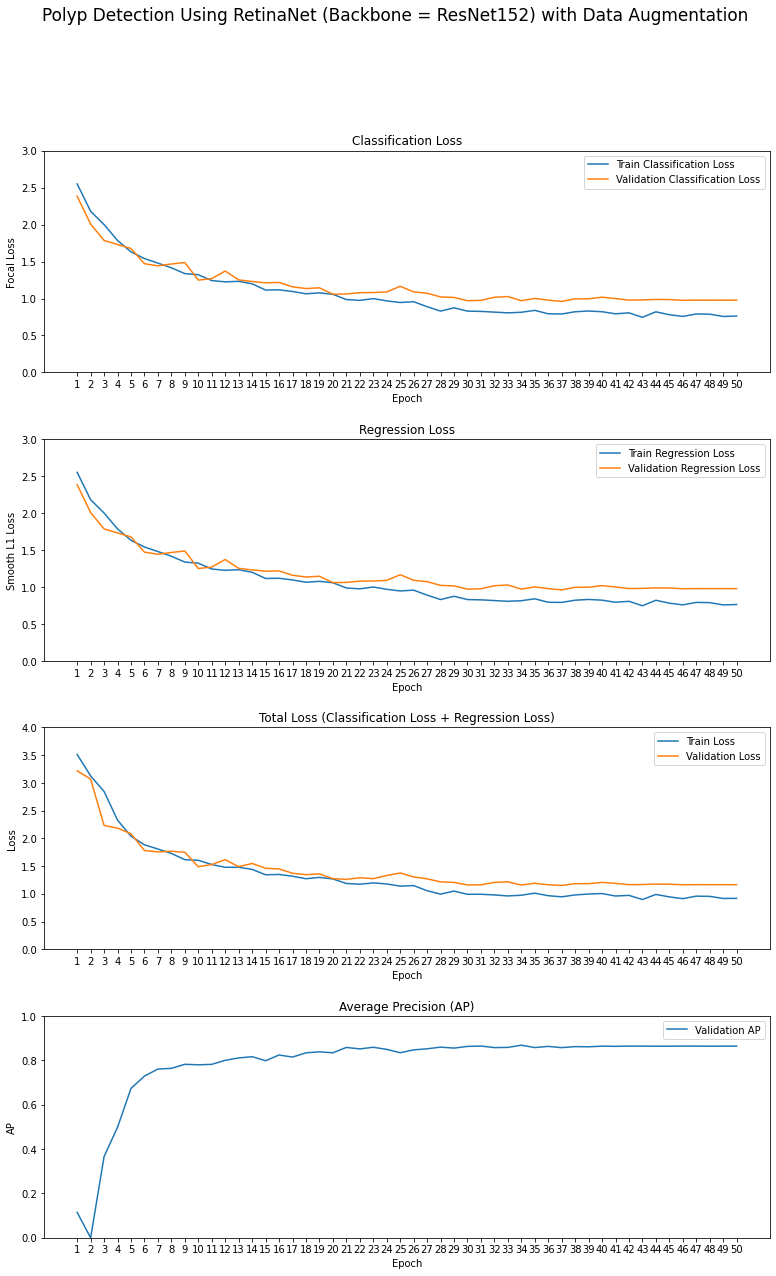

In [19]:
fig = './result/retinanet_resnet152_aug.png'
plot_history(history_aug, fig, 'Polyp Detection Using RetinaNet (Backbone = ResNet152) with Data Augmentation', epochs)